<a href="https://colab.research.google.com/github/gcalambas/MATCHPREDICTOR/blob/main/MATCHPREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matchpredict:Prediction partidos de Futbol

#Importación de librerias


In [1]:
#Vamos a importar las librerías para el primer EDA (Análisis Exploratorio de Datos)
import pandas as pd #librería para manipular datos
import numpy as np #librería para operaciones básicas, arreglos y matrices, etc.
import matplotlib.pyplot as plt #librería para visualizar en python
import seaborn as sns #librería para visualizar datos estadísticos

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Para clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Para regresión
from sklearn.metrics import r2_score

#Para despliegue web
from flask import Flask, request, render_template
import joblib

El código importa todas las librerías necesarias para trabajar con datos, construir modelos de Machine Learning y visualizarlos. Primero, carga herramientas para manipulación de datos como pandas y numpy, y para gráficos como matplotlib y seaborn, que ayudarán a entender y explorar la información. Luego, trae funciones de scikit-learn para procesar los datos, dividirlos en entrenamiento y prueba, y aplicar transformaciones como escalado o codificación de variables categóricas.

Además, el código importa varios modelos de Machine Learning, tanto para clasificación como para regresión, como Random Forest, K-Nearest Neighbors, Árboles de Decisión y Regresión Lineal, junto con métricas para evaluar su desempeño. Finalmente, también incluye herramientas para desplegar modelos en una aplicación web con Flask y para guardar modelos entrenados con joblib, lo que permite reutilizarlos sin necesidad de volver a entrenarlos desde cero

#Lectura de las basea de datos

In [2]:
#Conectar con google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Conectar Google Colab con Google Drive para cargar las bases de datos.
Se recomienda craer una carpeta para luego cargar las bases de datos y el resultado final, asi mismo el modelo y el HTML.

#Preprocesamiento de datos

In [4]:
#Cargar las bases de datos y mostrarlas
df_1 = pd.read_csv('/content/drive/MyDrive/dataset/futbol_act/goalscorers.csv')
df_2 = pd.read_csv ('/content/drive/MyDrive/dataset/futbol_act/results.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/dataset/futbol_act/shootouts.csv')
fifa_ranking =pd.read_csv('/content/drive/MyDrive/dataset/futbol_act/fifa_ranking-2024-06-20.csv')
display(df_1.head())
display(df_2.head())
display(df_3.head())
display(fifa_ranking.head())

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,140.0,Brunei Darussalam,BRU,2.0,0.0,140,AFC,1992-12-31
1,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
2,32.0,Zambia,ZAM,38.0,0.0,32,CAF,1992-12-31
3,31.0,Greece,GRE,38.0,0.0,31,UEFA,1992-12-31
4,30.0,Algeria,ALG,39.0,0.0,30,CAF,1992-12-31


Cargamos las 3 tablas del dataset original (goalscorers, results y shootouts)  de la siguiente paguina https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017 y le damos como nombre


df_1=goalscorers


df_2=results


df_3=shootouts


Variables de cada uno son

*  results.csv incluye las siguientes columnas:

* date - fecha del partido
* home_team - nombre del equipo local
* away_team - nombre del equipo visitante
* home_score - resultado final del equipo local, incluyendo la prórroga, sin incluir la tanda de penaltis
* away_score - resultado final del equipo visitante, incluyendo la prórroga, sin incluir la tanda de penaltis
* tournament - nombre del torneo
* city - nombre de la ciudad/localidad/unidad administrativa donde se jugó el partido
* country - nombre del país donde se jugó el partido
* neutral - columna VERDADERO/FALSO que indica si el partido se jugó en una sede neutral
shootouts.csv incluye las siguientes columnas:

date - fecha del partido
home_team - nombre del equipo local
away_team - nombre del equipo visitante
winner - ganador de la tanda de penaltis
first_shooter - el equipo que encabezó la tanda de penaltis
goalscorers.csv incluye las siguientes columnas:

date - Fecha del partido
Home_team - Nombre del equipo local
Walter_team - Nombre del equipo visitante
Equipo - Nombre del equipo que marcó el gol
Goleador - Nombre del jugador que marcó el gol
Gole en propia puerta - Si el gol fue en propia puerta
Penalty - Si el gol fue de penalti.

Los datos proporcionados incluyen información sobre partidos de fútbol a lo largo de la historia, organizados en tres tablas diferentes. La primera tabla se enfoca en los goles anotados en cada partido, registrando el nombre del jugador, el equipo, el minuto en que marcó, y si el gol fue de penal o autogol. Esto permite analizar patrones en la anotación de goles, como qué jugadores fueron más decisivos o en qué momentos del partido se marcan más tantos.

La segunda tabla contiene resultados de partidos internacionales, con información sobre los equipos locales y visitantes, el marcador final, el tipo de torneo y la ubicación del encuentro. Esto facilita el análisis de tendencias en el rendimiento de los equipos, la influencia de jugar en casa y la evolución del fútbol a lo largo del tiempo. La tercera tabla agrega la variable "winner", lo que permite estudiar directamente qué equipos ganaron más y explorar patrones en los resultados.

La base de datos de los ranking se encuentra en la siguiente paguina https://www.kaggle.com/datasets/cashncarry/fifaworldranking?select=fifa_ranking-2024-04-04.csv se empleo como complemento para la base de dastos origuinales.

Contiene información sobre el país, su abreviatura, la cantidad total de puntos que tiene en el ranking, los puntos que tenía en la clasificación anterior, el cambio de posición con respecto al ranking pasado, la confederación a la que pertenece (por ejemplo, AFC para Asia), y la fecha en la que se registró esa clasificación. Básicamente, muestra cómo ha cambiado la posición de cada selección a lo largo del tiempo.

Ahora crearemos las variables que nos dicen la cantidad de pelanles y autogoles que hizo el equipo local y visitante.


1.   Para ello filtramos la 'tabla' df_1 para quedarse solo con los goles marcados como penales o autogoles.
2.   Luego, comparamos si el equipo que hizo el gol coincide con el equipo local o visitante, asignando un 1 si es así y 0 si no.
3.   Por último, agrupamos estos datos por partido (usando la fecha 'date', el equipo local 'home_team' y el visitante 'away_score') y suma los valores para obtener el total de penales o autogoles de cada equipo.



Notemos que hay que calcular las variable objetivo, que está determinada por el resulatdo del partido.

La idea principal del código es clasificar cada partido según si el equipo local ganó, perdió o empató. Para hacerlo, compara los goles de ambos equipos y asigna un resultado. Esto permite tener una columna que indica claramente el desenlace de cada encuentro

In [5]:
df_final =df_2[['date', 'home_team', 'away_team', 'home_score', 'away_score',  'tournament', 'neutral']]
# Calcular la variable objetivo
def get_match_result(row):
    if row['home_score'] > row['away_score']:
        return 'Win'
    elif row['home_score'] < row['away_score']:
        return 'Lose'
    else:
        return 'Draw'

df_final['target'] = df_final.apply(get_match_result, axis=1)

<ipython-input-5-12574c10be09>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['target'] = df_final.apply(get_match_result, axis=1)


Por último, agreguemos a df_final que es lo que queremos obtener, las columnas (features) que queremos tener al final.

In [6]:
# Filtrar las columnas finales
df_final = df_final[[
    'date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral', 'target'
]]

display(df_final.head())

,date,home_team,away_team,home_score,away_score,tournament,neutral,target
0,1872-11-30,Scotland,England,0,0,Friendly,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,False,Win


Se selecciona el torneo de la FIFA porque es uno de los campeonatos más importantes a nivel mundial, reuniendo a equipos de distintas regiones y proporcionando un alto nivel de competitividad. Además, dentro de la base de datos, este torneo cuenta con una mayor cantidad de registros, lo que permite obtener análisis más precisos y representativos sobre el rendimiento de los equipos en competencias internacionales.

In [7]:
#vamos a filtrar los partidos y dejaremos en el dataset sólo el torneo fifa world cop qualification
df_final=df_final[(df_final['tournament']=='FIFA World Cup qualification')]
display(df_final.head())

,date,home_team,away_team,home_score,away_score,tournament,neutral,target
1748,1933-06-11,Sweden,Estonia,6,2,FIFA World Cup qualification,False,Win
1753,1933-06-29,Lithuania,Sweden,0,2,FIFA World Cup qualification,False,Lose
1772,1933-09-24,Yugoslavia,Switzerland,2,2,FIFA World Cup qualification,False,Draw
1780,1933-10-15,Poland,Czechoslovakia,1,2,FIFA World Cup qualification,False,Lose
1787,1933-10-29,Switzerland,Romania,2,2,FIFA World Cup qualification,False,Draw


Se eliminan las columnas que no aportan información relevante al análisis. La variable "city" se descarta porque la ubicación del partido ya está representada en las columnas "home_team" y "away_team". Asimismo, se elimina la columna "tournament", ya que solo se ha seleccionado un torneo específico, por lo que esta variable se vuelve redundante. Estos ajustes permiten simplificar los datos y enfocarse en las variables realmente útiles para el análisis.

Se asegura de que la columna "date" esté en formato de fecha y ordena los datos cronológicamente, evitando posibles errores en los cálculos.

Después de organizar la información, el código calcula el total de goles anotados por el equipo local y el visitante en sus últimos tres partidos, lo que ayuda a medir su desempeño reciente. Estos valores se asignan a las nuevas columnas "goals_home_3" y "goals_away_3", y los posibles valores nulos se reemplazan con ceros para evitar problemas en futuros análisis.

In [8]:
# Eliminar la columna 'tournament'
df_final = df_final.drop('tournament', axis=1)

# Asegurarse de que la columna 'date' esté en formato datetime
df_final['date'] = pd.to_datetime(df_final['date'])

# Ordenar por fecha y resetear el índice para evitar errores
df_final = df_final.sort_values('date').reset_index(drop=True)

#Goles anotados por el equipo local en sus últimos 3 partidos
df_final['goals_home_3'] = (
    df_final
    .groupby('home_team')['home_score']
    .transform(lambda x: x.shift(1).rolling(3).sum())
)
df_final['goals_away_3'] = (
    df_final
    .groupby('away_team')['away_score']
    .transform(lambda x: x.shift(1).rolling(3).sum())
)



# Rellenar NaN con ceros o algún valor neutro
df_final['goals_home_3'] = df_final['goals_home_3'].fillna(0)
df_final['goals_away_3'] = df_final['goals_away_3'].fillna(0)

display(df_final.head(10))


,date,home_team,away_team,home_score,away_score,neutral,target,goals_home_3,goals_away_3
0,1933-06-11,Sweden,Estonia,6,2,False,Win,0.0,0.0
1,1933-06-29,Lithuania,Sweden,0,2,False,Lose,0.0,0.0
2,1933-09-24,Yugoslavia,Switzerland,2,2,False,Draw,0.0,0.0
3,1933-10-15,Poland,Czechoslovakia,1,2,False,Lose,0.0,0.0
4,1933-10-29,Switzerland,Romania,2,2,False,Draw,0.0,0.0
5,1934-01-28,Haiti,Cuba,1,3,False,Lose,0.0,0.0
6,1934-02-01,Haiti,Cuba,1,1,False,Draw,0.0,0.0
7,1934-02-04,Haiti,Cuba,0,6,False,Lose,0.0,0.0
8,1934-02-25,Republic of Ireland,Belgium,4,4,True,Draw,0.0,0.0
9,1934-03-04,Mexico,Cuba,3,2,False,Win,0.0,10.0


Se eliminaron ciertas columnas para reducir la redundancia y enfocarse en las variables realmente útiles para el análisis. "home_score" y "away_score" fueron eliminadas porque el resultado del partido ya se encuentra representado en la variable "target", la cual indica si el equipo local ganó, perdió o empató. De manera similar, las columnas "own_goals_home", "own_goals_away", "penalties_scored_home" y "penalties_scored_away" se removieron porque, aunque pueden influir en el resultado, no son esenciales para la estructura del modelo y podrían agregar ruido en lugar de mejorar la predicción.

Además, la variable "target" se sacó temporalmente y se volvió a agregar al final del DataFrame para mejorar la organización de los datos. Esto facilita la visualización y el procesamiento del dataset, especialmente si se va a entrenar un modelo de machine learning, ya que es común colocar la variable objetivo al final para que sea más fácil diferenciarla de las variables explicativas.

In [9]:
df_final = df_final.drop('home_score', axis=1)
df_final = df_final.drop('away_score', axis=1)
# Sacar la columna target y volverla a agregar al final
target = df_final['target']
df_final = df_final.drop(columns=['target'])
df_final['target'] = target

display(df_final.head(15))

,date,home_team,away_team,neutral,goals_home_3,goals_away_3,target
0,1933-06-11,Sweden,Estonia,False,0.0,0.0,Win
1,1933-06-29,Lithuania,Sweden,False,0.0,0.0,Lose
2,1933-09-24,Yugoslavia,Switzerland,False,0.0,0.0,Draw
3,1933-10-15,Poland,Czechoslovakia,False,0.0,0.0,Lose
4,1933-10-29,Switzerland,Romania,False,0.0,0.0,Draw
5,1934-01-28,Haiti,Cuba,False,0.0,0.0,Lose
6,1934-02-01,Haiti,Cuba,False,0.0,0.0,Draw
7,1934-02-04,Haiti,Cuba,False,0.0,0.0,Lose
8,1934-02-25,Republic of Ireland,Belgium,True,0.0,0.0,Draw
9,1934-03-04,Mexico,Cuba,False,0.0,10.0,Win


Se está limpiando y reorganizando un conjunto de datos. Primero, elimina varias columnas relacionadas con los goles y penales anotados por los equipos locales y visitantes, ya no son necesarias para el análisis. Luego, extrae la columna "target" la variable que se quiere predecir, la elimina del DataFrame y la vuelve a agregar al final para asegurarse de que esté en la última posición. Finalmente, muestra las primeras 15 filas del DataFrame resultante para verificar que los cambios se hayan aplicado correctamente.

In [10]:
# Convertir columnas de fechas a tipo datetime
df_final['date'] = pd.to_datetime(df_final['date'])
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])

# Ordenar el ranking por fecha para merge_asof
fifa_ranking = fifa_ranking.sort_values('rank_date')

# Crear un DataFrame para cada tipo de equipo (home y away) con las fechas del partido
home_rank = df_final[['date', 'home_team']].rename(columns={'home_team': 'country_full'})
away_rank = df_final[['date', 'away_team']].rename(columns={'away_team': 'country_full'})

# Ordenar por fecha para merge_asof
home_rank = home_rank.sort_values('date')
away_rank = away_rank.sort_values('date')

# Obtener ranking más reciente antes del partido para el equipo local
home_rank = pd.merge_asof(home_rank, fifa_ranking.sort_values('rank_date'),
                          left_on='date', right_on='rank_date',
                          by='country_full', direction='backward')

# Obtener ranking más reciente antes del partido para el equipo visitante
away_rank = pd.merge_asof(away_rank, fifa_ranking.sort_values('rank_date'),
                          left_on='date', right_on='rank_date',
                          by='country_full', direction='backward')

# Agregar los rankings al dataframe original
df_final['ranking_home'] = home_rank['rank']
df_final['ranking_away'] = away_rank['rank']

# Mostrar las primeras filas con las nuevas columnas
df_final[['date', 'home_team', 'ranking_home', 'away_team', 'ranking_away']].head()


,date,home_team,ranking_home,away_team,ranking_away
0,1933-06-11,Sweden,NaN,Estonia,NaN
1,1933-06-29,Lithuania,NaN,Sweden,NaN
2,1933-09-24,Yugoslavia,NaN,Switzerland,NaN
3,1933-10-15,Poland,NaN,Czechoslovakia,NaN
4,1933-10-29,Switzerland,NaN,Romania,NaN


Se asigna el ranking FIFA más reciente a cada equipo antes de un partido. Primero, convierte las fechas a un formato adecuado (datetime) y ordena la tabla de rankings por fecha. Luego, crea dos nuevas tablas: una para los equipos locales y otra para los visitantes, asegurando que los datos estén organizados por fecha. Después, usa merge_asof para encontrar el ranking más cercano pero anterior al partido de cada equipo. Finalmente, añade estos rankings al dataframe principal (df_final), permitiendo analizar cómo la clasificación de los equipos influye en los resultados de los partidos.

In [11]:
df_final = df_final[df_final['date'].dt.year >= 2005]

In [12]:
# Filtrar las filas donde haya valores NaN en ranking_home o ranking_away
ranking_nans = df_final[df_final[['ranking_home', 'ranking_away']].isna().any(axis=1)]
display(ranking_nans.head(10))
display(ranking_nans.info(10))


,date,home_team,away_team,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away
4185,2005-02-09,Uzbekistan,Saudi Arabia,False,10.0,5.0,Draw,NaN,55.0
4187,2005-02-09,Spain,San Marino,False,10.0,0.0,Win,50.0,NaN
4188,2005-02-09,North Macedonia,Andorra,False,5.0,1.0,Draw,19.0,NaN
4192,2005-02-09,Costa Rica,Mexico,False,8.0,9.0,Lose,61.0,NaN
4196,2005-03-25,Iran,Japan,False,10.0,7.0,Win,NaN,18.0
4197,2005-03-25,North Korea,Bahrain,False,6.0,4.0,Lose,NaN,52.0
4199,2005-03-25,Saudi Arabia,South Korea,False,9.0,3.0,Win,30.0,NaN
4212,2005-03-26,Senegal,Liberia,False,4.0,0.0,Win,NaN,36.0
4214,2005-03-26,Romania,Netherlands,False,5.0,5.0,Lose,84.0,NaN
4234,2005-03-27,Egypt,Libya,False,12.0,2.0,Win,NaN,79.0


<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 4185 to 8258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          623 non-null    datetime64[ns]
 1   home_team     623 non-null    object        
 2   away_team     623 non-null    object        
 3   neutral       623 non-null    bool          
 4   goals_home_3  623 non-null    float64       
 5   goals_away_3  623 non-null    float64       
 6   target        623 non-null    object        
 7   ranking_home  297 non-null    float64       
 8   ranking_away  290 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(3)
memory usage: 44.4+ KB


None

Se identifica los partidos donde falta el ranking FIFA para al menos uno de los equipos. Primero, busca filas en df_final donde ranking_home o ranking_away tengan valores faltantes (NaN). Luego, muestra las primeras 10 filas con este problema y un resumen de la información, lo que ayuda a entender cuántos datos están incompletos y si es necesario corregir o eliminar esos registros antes de continuar con el análisis.

In [13]:
nombres_alternativos = {
    'South Korea': 'Korea Republic',
    'North Korea': 'Korea DPR',
    'Ivory Coast': "Côte d'Ivoire",
    'DR Congo': 'Congo DR',
    'Czech Republic': 'Czechia',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'United States': 'USA',#
    'Iran': 'IR Iran',#
    'Taiwan': 'Chinese Taipei',#
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Curaçao': 'Curacao',
    'United States Virgin Islands': 'US Virgin Islands',#
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Gambia': 'The Gambia',
    'Dominican Republic': 'Dominicas',
    'São Tomé and Príncipe': 'Sao Tome and Principe'
}

df_final['home_team'] = df_final['home_team'].replace(nombres_alternativos)
df_final['away_team'] = df_final['away_team'].replace(nombres_alternativos)
df_final.head()

,date,home_team,away_team,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away
4184,2005-02-09,Morocco,Kenya,False,5.0,1.0,Win,18.0,14.0
4185,2005-02-09,Uzbekistan,Saudi Arabia,False,10.0,5.0,Draw,NaN,55.0
4186,2005-02-09,Trinidad and Tobago,USA,False,8.0,4.0,Lose,86.0,57.0
4187,2005-02-09,Spain,San Marino,False,10.0,0.0,Win,50.0,NaN
4188,2005-02-09,North Macedonia,Andorra,False,5.0,1.0,Draw,19.0,NaN


Se estandariza los nombres de los países en el dataframe df_final, asegurando que coincidan con los utilizados en la base de datos del ranking FIFA. Se crea un diccionario (nombres_alternativos) con equivalencias de nombres y luego se aplican esos cambios a las columnas home_team y away_team, pero a pesar de estas modificaciones aun hay presencia de valores faltantes.

In [14]:
ranking_nans = df_final[df_final[['ranking_home', 'ranking_away']].isna().any(axis=1)]
display(ranking_nans.head(10))
display(ranking_nans.info())

,date,home_team,away_team,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away
4185,2005-02-09,Uzbekistan,Saudi Arabia,False,10.0,5.0,Draw,NaN,55.0
4187,2005-02-09,Spain,San Marino,False,10.0,0.0,Win,50.0,NaN
4188,2005-02-09,North Macedonia,Andorra,False,5.0,1.0,Draw,19.0,NaN
4192,2005-02-09,Costa Rica,Mexico,False,8.0,9.0,Lose,61.0,NaN
4196,2005-03-25,IR Iran,Japan,False,10.0,7.0,Win,NaN,18.0
4197,2005-03-25,Korea DPR,Bahrain,False,6.0,4.0,Lose,NaN,52.0
4199,2005-03-25,Saudi Arabia,Korea Republic,False,9.0,3.0,Win,30.0,NaN
4212,2005-03-26,Senegal,Liberia,False,4.0,0.0,Win,NaN,36.0
4214,2005-03-26,Romania,Netherlands,False,5.0,5.0,Lose,84.0,NaN
4234,2005-03-27,Egypt,Libya,False,12.0,2.0,Win,NaN,79.0


<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 4185 to 8258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          623 non-null    datetime64[ns]
 1   home_team     623 non-null    object        
 2   away_team     623 non-null    object        
 3   neutral       623 non-null    bool          
 4   goals_home_3  623 non-null    float64       
 5   goals_away_3  623 non-null    float64       
 6   target        623 non-null    object        
 7   ranking_home  297 non-null    float64       
 8   ranking_away  290 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(3)
memory usage: 44.4+ KB


None

Este código busca y muestra los partidos donde falta el ranking FIFA de al menos uno de los equipos. Primero, filtra df_final para encontrar las filas en las que "ranking_home" o "ranking_away" tengan valores faltantes (NaN).

In [15]:
#datos faltantes en la bsse d edatos
df_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
neutral,0
goals_home_3,0
goals_away_3,0
target,0
ranking_home,326
ranking_away,333


 Se ecuentran valores faltantes en el ranking, esto podría deberse a que el ranking FIFA no existía en ciertas fechas o que algunos equipos no estaban clasificados en ese momento. Para evitar problemas en el análisis o en los modelos, se decide completar con imputacion de datos por medio de KNN.

**Imputación de datos por el metodo KNN.**

In [16]:
#Imputacion de datos por el metodo kn para ranking_home y ranking_away
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_final[['ranking_home', 'ranking_away']] = imputer.fit_transform(df_final[['ranking_home', 'ranking_away']])

Se completa los rankings FIFA que faltan en los datos en lugar de dejarlos vacíos. Usa un método llamado KNN Imputer, que busca los 5 equipos más parecidos y toma sus rankings para estimar los valores faltantes. Así, en lugar de eliminar partidos con información incompleta, se rellenan de manera inteligente basándose en equipos similares. Esto ayuda a que los datos sean más completos y útiles para el análisis.

In [17]:
#Cantidad de datos faltantes pro variables en df_final
df_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
neutral,0
goals_home_3,0
goals_away_3,0
target,0
ranking_home,0
ranking_away,0


Muestra que no hay valores atipicos, la  imputacion salio correctamente en las variables ranking_home y ranking_away.

#Análisis exploratorio de datos

##Análisis univariado

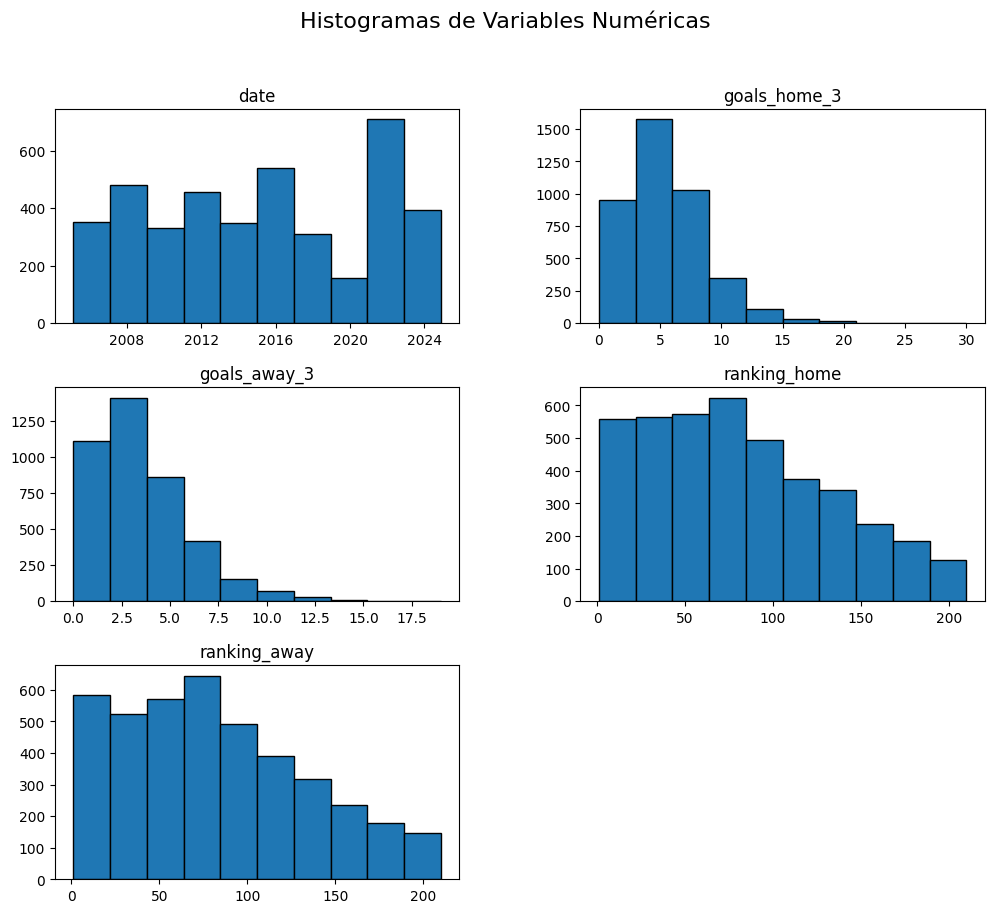

In [18]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
df_final=df_final[df_final['date'].dt.year >= 2005]
df_final.hist(figsize=(12, 10), bins=10, grid=False, edgecolor="black")
# Ajustar el diseño y mostrar
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()

La distribución de los goles anotados en casa y de visita es asimétrica a la derecha, lo que indica que la mayoría de los equipos anotan pocos goles por partido, con algunos valores atípicos de marcadores altos. Las clasificaciones de los equipos locales y visitantes siguen una distribución más uniforme con una ligera tendencia decreciente, lo que sugiere que hay más equipos con posiciones medias en el ranking y menos en los extremos. La variable de fechas sugiere una distribución variable a lo largo del tiempo, con un aumento reciente en la frecuencia de los datos, lo que podría reflejar una mayor recopilación de información en los últimos años.

<ipython-input-19-1d128834f9ab>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['goals_home_3', 'goals_away_3'])


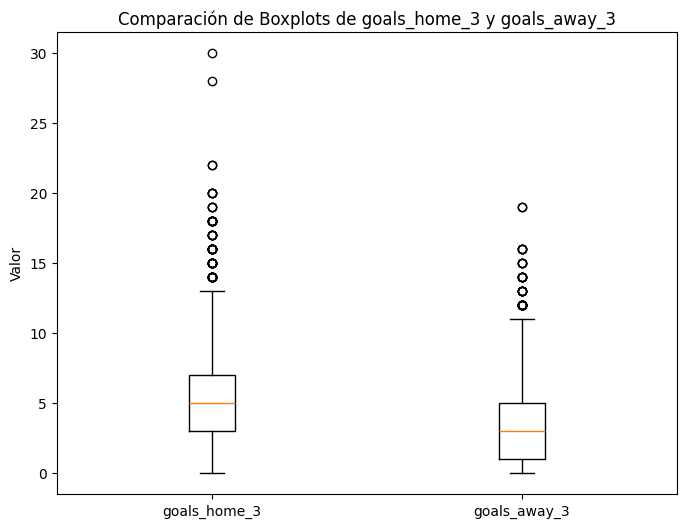

<ipython-input-19-1d128834f9ab>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['ranking_home', 'ranking_away'])


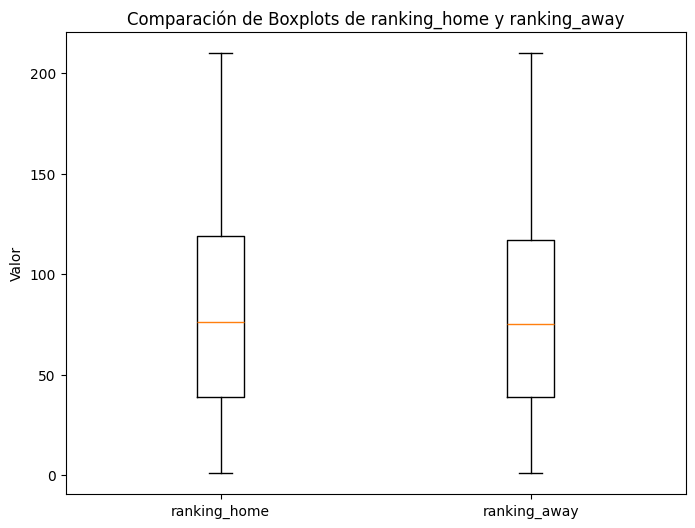

In [19]:
#Boxplot de comparacion entre goals_home_3 y goals_away_3 de toda la base de datos comparacion para medias
boxplot_data = [df_final['goals_home_3'], df_final['goals_away_3']]
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=['goals_home_3', 'goals_away_3'])
plt.title('Comparación de Boxplots de goals_home_3 y goals_away_3')
plt.ylabel('Valor')
plt.show()

#Boxplot de comparacion entre rankig_home y ranking_away
boxplot_data = [df_final['ranking_home'], df_final['ranking_away']]
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=['ranking_home', 'ranking_away'])
plt.title('Comparación de Boxplots de ranking_home y ranking_away')
plt.ylabel('Valor')
plt.show()

En goals_home_3, la mayoría de los equipos anota entre 0 y 5 goles en sus últimos tres partidos como local, pero aparecen valores atípicos que superan los 20, lo que sugiere una capacidad ofensiva inusual o partidos con marcadores muy altos. Por su parte, goals_away_3 presenta una mediana aún más baja, pero también incluye outliers que alcanzan los 15 goles, demostrando que algunos equipos pueden anotar mucho incluso fuera de casa. Estas diferencias en la dispersión reflejan la variabilidad en el poder ofensivo y pueden influir de manera significativa al momento de predecir resultados futuros.

Al observar los box plots de ranking_home y ranking_away, se nota que la mayoría de los equipos se concentra entre las posiciones 50 y 100. Es importante recordar que, en el ranking, un número más bajo indica un mejor desempeño, por lo que estos valores muestran que la mayoría de los equipos tiene un nivel medio, con algunos casos muy fuertes o muy débiles que se salen de este rango.

In [20]:
# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({
    "Prueba": [
        "Shapiro-Wilk (Normalidad) - goals_home_3",
        "Shapiro-Wilk (Normalidad) - goals_away_3",
        "Prueba t de Student (Medias)",
        "Wilcoxon (Mann-Whitney U) (Medianas)"
    ],
    "Estadístico": [
        "W = 0.92701",
        "W = 0.89883",
        "t = 26.248",
        "W = 11,095,156"
    ],
    "p-valor": [
        "< 2.2e-16",
        "< 2.2e-16",
        "< 2.2e-16",
        "< 2.2e-16"
    ],
    "Conclusión": [
        "No es normal",
        "No es normal",
        "Diferencia significativa de medias",
        "Diferencia significativa de distribuciones"
    ]
})

# Mostrar la tabla
from IPython.display import display
display(tabla_resultados)


,Prueba,Estadístico,p-valor,Conclusión
0,Shapiro-Wilk (Normalidad) - goals_home_3,W = 0.92701,< 2.2e-16,No es normal
1,Shapiro-Wilk (Normalidad) - goals_away_3,W = 0.89883,< 2.2e-16,No es normal
2,Prueba t de Student (Medias),t = 26.248,< 2.2e-16,Diferencia significativa de medias
3,Wilcoxon (Mann-Whitney U) (Medianas),"W = 11,095,156",< 2.2e-16,Diferencia significativa de distribuciones


Los resultados confirman que los equipos tienen un desempeño significativamente mejor cuando juegan de local en comparación con cuando juegan de visitante. Tanto la prueba t como la prueba de Wilcoxon indican que la diferencia en la cantidad de goles no es aleatoria, sino que refleja un patrón consistente. Además, dado que los datos no siguen una distribución normal, el uso de pruebas no paramétricas refuerza la validez del hallazgo. Esto sugiere que el factor localía influye en el rendimiento ofensivo de los equipos, posiblemente debido a variables como la familiaridad con el estadio, la presión del público o incluso sesgos arbitrales. Desde una perspectiva estadística, este hallazgo es robusto y podría complementarse con modelos más avanzados que consideren otros factores como el rendimiento defensivo, la fatiga de los jugadores o la dinámica del torneo.

In [21]:
from IPython.display import display

# Crear el DataFrame con los resultados
tabla_resultados = pd.DataFrame({
    "Prueba": [
        "Shapiro-Wilk (Normalidad) - ranking_home",
        "Shapiro-Wilk (Normalidad) - ranking_away",
        "Prueba t de Student (Medias)",
        "Wilcoxon (Mann-Whitney U) (Medianas)"
    ],
    "Estadístico": [
        "W = 0.96132",
        "W = 0.96106",
        "t = -0.26884",
        "W = 8,290,850"
    ],
    "p-valor": [
        "< 2.2e-16",
        "< 2.2e-16",
        "0.7881",
        "0.82"
    ],
    "Conclusión": [
        "No es normal",
        "No es normal",
        "No hay diferencia significativa de medias",
        "No hay diferencia significativa de distribuciones"
    ]
})

# Mostrar la tabla de resultados
display(tabla_resultados)


,Prueba,Estadístico,p-valor,Conclusión
0,Shapiro-Wilk (Normalidad) - ranking_home,W = 0.96132,< 2.2e-16,No es normal
1,Shapiro-Wilk (Normalidad) - ranking_away,W = 0.96106,< 2.2e-16,No es normal
2,Prueba t de Student (Medias),t = -0.26884,0.7881,No hay diferencia significativa de medias
3,Wilcoxon (Mann-Whitney U) (Medianas),"W = 8,290,850",0.82,No hay diferencia significativa de distribuciones


Los resultados muestran que los rankings de los equipos no siguen una distribución normal, lo que significa que su comportamiento no se ajusta a la típica "campana" de la distribución normal. Además, al comparar los rankings de los equipos locales y visitantes, las pruebas indican que no hay una diferencia significativa ni en sus medias ni en su distribución, es decir, en general, los equipos tienen rankings similares sin importar si juegan en casa o fuera. Esto sugiere que la localía no tiene un impacto claro en el ranking de los equipos.

##Análisis Bivariado

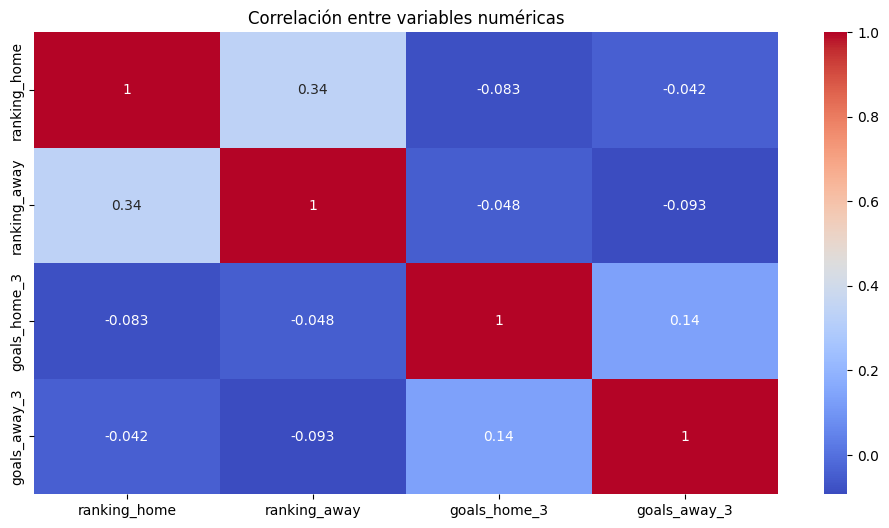

In [22]:
#correlacion para las variables numericas
numeric_columns = ['ranking_home', 'ranking_away', 'goals_home_3', 'goals_away_3']
plt.figure(figsize=(12, 6))
sns.heatmap(df_final[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

Este gráfico de correlación muestra la relación entre el ranking de los equipos y la cantidad de goles anotados en casa y como visitante. Observamos que el ranking en casa y el ranking de visitante tienen una correlación moderada, lo cual es esperable, ya que los equipos generalmente mantienen un nivel similar en ambas condiciones.

Por otro lado, los goles anotados en casa y de visitante tienen una correlación baja , lo que sugiere que el desempeño ofensivo de un equipo puede variar dependiendo de si juega de local o visitante, pero no de manera determinante. Además, la relación entre el ranking y los goles es casi inexistente (valores entre -0.04 y -0.09), lo que indica que el ranking no es un fuerte predictor del número de goles que un equipo anota en un partido específico.

Desde una perspectiva futbolística, estos resultados refuerzan la idea de que el ranking refleja el rendimiento general de un equipo en una temporada, pero no necesariamente determina su efectividad en cada partido. Equipos con un ranking alto pueden tener días malos y equipos con ranking bajo pueden sorprender con buenos desempeños ofensivos, especialmente en contextos específicos como la localía.

# Filtrado de datos

In [23]:
#Limite superior de goals_away_3 y goals_home_3
Q1 = df_final['goals_home_3'].quantile(0.25)
Q3 = df_final['goals_home_3'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f'Límite inferior: {lower_limit}')
print(f'Límite superior: {upper_limit}')
q1 = df_final['goals_away_3'].quantile(0.25)
q3 = df_final['goals_away_3'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print(f'Límite inferior: {lower_limit}')
print(f'Límite superior: {upper_limit}')

Límite inferior: -3.0
Límite superior: 13.0
Límite inferior: -5.0
Límite superior: 11.0


Los límites de los bigotes del boxplot nos indican el rango en el que se encuentran la mayoría de los datos sin considerar los valores atípicos. En este caso, los datos se mantienen entre -3.0 y 13.0 en un caso, y entre -5.0 y 11.0 en otro. Cualquier valor fuera de estos rangos es considerado un posible atípico, lo que significa que está demasiado alejado del comportamiento típico del conjunto de datos además la naturaleza de los goles es positivas (mayores a 0).

In [24]:
#Eliminar goals_home_3 y goals_home_3 con valores superiores a 15
df_final = df_final[(df_final['goals_home_3'] <= 15) & (df_final['goals_away_3'] <= 15)]
#Los valores maximos de goals_home_3 y goals_away_3
print(df_final['goals_home_3'].max())
print(df_final['goals_away_3'].max())

15.0
15.0


Los resultados de los tres ultimos goles estan basados en la cantidad de goles realizados asi mismo de los penalties, recordando la regla de los 5 tiros por equipo hace razonable que se selccionen valores menore a 15 por los tres partidos luego se escalan los valores numericos para que se puedan interpretar de mejor manera.

Se verifica aplicando el maximo de ambas variables.

In [25]:
#numero de observaciones y  columnas
df_final.shape

(4027, 9)

# Escalamiento de los datos numericos y Codificación de variabless categóricas

In [26]:
#Escalamiento de los datos numericos
from sklearn.preprocessing import MinMaxScaler
#Seleccionar las variables numericas
numerical_features = ['goals_home_3', 'goals_away_3', 'ranking_home', 'ranking_away']
# Ahora escalaremos las columnas numéricas están escaladas entre 0 y 1 - haciendo uso de scaler de la libreria sklearn
scaler = MinMaxScaler()
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])
# Imprimir el DataFrame completo con las características escaladas
df_final.info()
df_final

<class 'pandas.core.frame.DataFrame'>
Index: 4027 entries, 4184 to 8261
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4027 non-null   datetime64[ns]
 1   home_team     4027 non-null   object        
 2   away_team     4027 non-null   object        
 3   neutral       4027 non-null   bool          
 4   goals_home_3  4027 non-null   float64       
 5   goals_away_3  4027 non-null   float64       
 6   target        4027 non-null   object        
 7   ranking_home  4027 non-null   float64       
 8   ranking_away  4027 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(3)
memory usage: 287.1+ KB


,date,home_team,away_team,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away
4184,2005-02-09,Morocco,Kenya,False,0.333333,0.066667,Win,0.081340,0.062201
4185,2005-02-09,Uzbekistan,Saudi Arabia,False,0.666667,0.333333,Draw,0.326316,0.258373
4186,2005-02-09,Trinidad and Tobago,USA,False,0.533333,0.266667,Lose,0.406699,0.267943
4187,2005-02-09,Spain,San Marino,False,0.666667,0.000000,Win,0.234450,0.199043
4188,2005-02-09,North Macedonia,Andorra,False,0.333333,0.066667,Draw,0.086124,0.463158
...,...,...,...,...,...,...,...,...,...
8257,2024-11-19,Palestine,Korea Republic,True,0.200000,0.533333,Draw,0.325359,0.162679
8258,2024-11-19,Oman,Iraq,False,0.400000,0.266667,Lose,0.449761,0.343541
8259,2024-11-19,Kuwait,Jordan,False,0.133333,0.333333,Draw,0.358852,0.258373
8260,2024-11-19,Bahrain,Australia,False,0.133333,0.200000,Draw,0.650718,0.320574


Este código ajusta los valores de las variables numéricas para que todos estén en la misma escala, entre 0 y 1, lo que facilita comparaciones y mejora el rendimiento de algunos modelos. Primero, selecciona las columnas numéricas (goals_home_3, goals_away_3, ranking_home, ranking_away). Luego, usa MinMaxScaler para transformar estos valores sin cambiar su distribución, simplemente reescalándolos dentro del nuevo rango. Esto es útil para evitar que variables con valores más grandes como el ranking, dominen a otras variables  más pequeñas en algoritmos de machine learning.

Datos categoricos

In [27]:
home_team_unique_count = df_final['home_team'].nunique()
away_team_unique_count = df_final['away_team'].nunique()
print(home_team_unique_count)
print(away_team_unique_count)
print(f'suma es {home_team_unique_count+ away_team_unique_count}')

211
211
suma es 422


Se tiene registrados 211 paises que participan en la FIFA tanto para locales como vicitantes.

In [28]:
df_final['home_team'] = df_final['home_team'].astype('category')
df_final['away_team'] = df_final['away_team'].astype('category')
categorical_columns = ['home_team', 'away_team']
df_final[categorical_columns] = df_final[categorical_columns].astype('category')
df_final = pd.get_dummies(df_final, columns=categorical_columns, drop_first=False)
encoded_columns = [col for col in df_final.columns if col.startswith('home_team_') or col.startswith('away_team_')]
df_final[encoded_columns] = df_final[encoded_columns].astype(int)
df_final

,date,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
4184,2005-02-09,False,0.333333,0.066667,Win,0.081340,0.062201,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4185,2005-02-09,False,0.666667,0.333333,Draw,0.326316,0.258373,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4186,2005-02-09,False,0.533333,0.266667,Lose,0.406699,0.267943,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4187,2005-02-09,False,0.666667,0.000000,Win,0.234450,0.199043,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4188,2005-02-09,False,0.333333,0.066667,Draw,0.086124,0.463158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,2024-11-19,True,0.200000,0.533333,Draw,0.325359,0.162679,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8258,2024-11-19,False,0.400000,0.266667,Lose,0.449761,0.343541,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8259,2024-11-19,False,0.133333,0.333333,Draw,0.358852,0.258373,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,2024-11-19,False,0.133333,0.200000,Draw,0.650718,0.320574,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La codificación One-Hot de "home_team" y "away_team" transforma los nombres de los equipos en variables binarias, lo que permite que cada equipo se considere de forma individual y evita que el modelo confunda su orden o valor numérico. Esto es clave para que los algoritmos de IA puedan aprender patrones específicos de cada equipo sin interpretaciones erróneas.

Además, convertir la variable "neutral" a un formato binario (0 o 1) simplifica la distinción entre partidos jugados en casa y aquellos en terreno neutral. Con estos ajustes, se prepara la base de datos para que los modelos de inteligencia artificial trabajen con información clara y consistente, mejorando la precisión y eficiencia en la predicción de resultados.

In [29]:
df_final['neutral'] = df_final['neutral'].astype(int)
df_final

,date,neutral,goals_home_3,goals_away_3,target,ranking_home,ranking_away,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe
4184,2005-02-09,0,0.333333,0.066667,Win,0.081340,0.062201,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4185,2005-02-09,0,0.666667,0.333333,Draw,0.326316,0.258373,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4186,2005-02-09,0,0.533333,0.266667,Lose,0.406699,0.267943,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4187,2005-02-09,0,0.666667,0.000000,Win,0.234450,0.199043,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4188,2005-02-09,0,0.333333,0.066667,Draw,0.086124,0.463158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8257,2024-11-19,1,0.200000,0.533333,Draw,0.325359,0.162679,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8258,2024-11-19,0,0.400000,0.266667,Lose,0.449761,0.343541,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8259,2024-11-19,0,0.133333,0.333333,Draw,0.358852,0.258373,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8260,2024-11-19,0,0.133333,0.200000,Draw,0.650718,0.320574,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se aplica codifcacion para la variable bool llamada neutral

In [30]:
print("Número de columnas generadas por One-Hot Encoding:", len(df_final.columns))
#211 de home_team, 211 de away_team, 2 de neutral y 7 del resto del dataset

Número de columnas generadas por One-Hot Encoding: 429


Como resultado, despues de la codificasión de obtienen 431 columnas de las cuales 422 son las codificadas y 7 de las que se tenian inicialmente.

# Balanceado

Importación de las librerias necesarias para aplicar el balanceado.

In [31]:
from imblearn.over_sampling import SMOTE # una de las mejores para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek # Estas 3 últimas librerías sirven para generar datos sintéticos

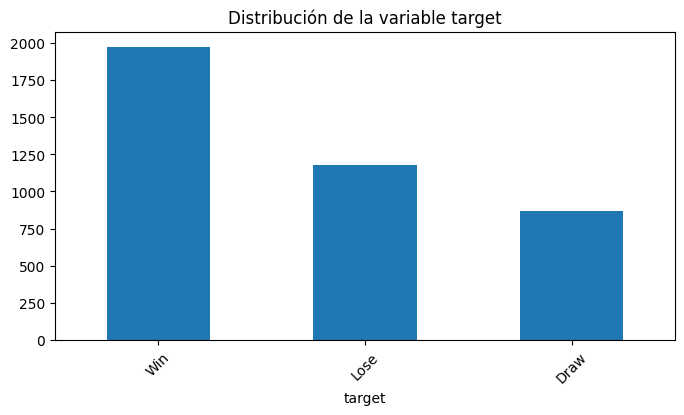

In [32]:
plt.figure(figsize=(8, 4))
df_final["target"].value_counts().plot(kind="bar", title="Distribución de la variable target")
plt.xticks(rotation=45)
plt.show()

La gráfica muestra la distribución original de la variable "target" en tres categorías: empate, derrota y victoria. A simple vista, se observa que la clase de "victoria" es la más numerosa, seguida por la de "derrota" y finalmente la de "empate", que es la menos representada. Este desequilibrio indica que, si no se toman medidas para balancear los datos, un modelo predictivo podría inclinarse a clasificar la mayoría de los casos como victorias, ignorando patrones relevantes en las demás categorías.

Como se mencionó antes, se transformó la variable objetivo a valores numéricos y se separó la información en variables predictoras y objetivo. Luego, se aplicó la técnica de SMOTE combinada con Tomek Links para equilibrar la distribución de clases, reduciendo así el sesgo hacia la categoría mayoritaria. Esto es fundamental para que el modelo de IA aprenda de manera justa sobre todas las clases, incrementando la precisión y la robustez de las predicciones futuras.

In [33]:
class_distribution = df_final["target"].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)

Distribución de clases antes del balanceo:
target
Win     1975
Lose    1180
Draw     872
Name: count, dtype: int64


Estos datos muestran un desequilibrio en las clases antes de aplicar un método de balanceo. Hay muchas más victorias (1,975) en comparación con derrotas (1,180) y empates (872). Esto puede afectar el rendimiento del modelo de machine learning, ya que podría aprender a predecir mejor la clase mayoritaria ("Win") mientras tiene más dificultades para identificar derrotas o empates. Para mejorar el modelo, se aplica la técnica de balanceo de la combinacion con SMOTE y Submuestreo con RandomUnderSampler.

In [34]:
#Convertir Draw en 0 , Lose en 1 y Win en 2
df_final['target'] = df_final['target'].replace({'Draw': 0, 'Lose': 1, 'Win': 2})
#Quitar target y colocarlo al final
target = df_final['target']
df_final = df_final.drop(columns=['target'])
df_final['target'] = target
df_final.head()

<ipython-input-34-7a600d63468a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['target'] = df_final['target'].replace({'Draw': 0, 'Lose': 1, 'Win': 2})
<ipython-input-34-7a600d63468a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final['target'] = target


,date,neutral,goals_home_3,goals_away_3,ranking_home,ranking_away,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_American Samoa,...,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe,target
4184,2005-02-09,0,0.333333,0.066667,0.081340,0.062201,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4185,2005-02-09,0,0.666667,0.333333,0.326316,0.258373,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4186,2005-02-09,0,0.533333,0.266667,0.406699,0.267943,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4187,2005-02-09,0,0.666667,0.000000,0.234450,0.199043,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4188,2005-02-09,0,0.333333,0.066667,0.086124,0.463158,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se convierte la variable "target" en valores numéricos, asignando 0 a los empates ("Draw"), 1 a las derrotas ("Lose") y 2 a las victorias ("Win"). Esto es importante porque muchos modelos de machine learning funcionan mejor con datos numéricos en lugar de texto. Luego, mueve la columna "target" al final del DataFrame, asegurando que no interfiera con el resto de las variables al entrenar el modelo.

In [35]:
# Paso 4: Aplicar técnicas de balanceo
# Convertir variables categóricas en numéricas si es necesario
df_final = pd.get_dummies(df_final, drop_first=True)

In [36]:
#guardar la variable date en date para luego eliminarla de df_final
date = df_final['date']
df_final.drop(columns=['date'], inplace=True)

Eliminación de la variable date debido a que afecta el balanceado.

In [37]:
# Definir variables predictoras y la variable objetivo
X = df_final.drop(columns=["target"])
y = df_final["target"]

Se separa las variables predictoras (X) de la variable objetivo (y), que es la que se quiere predecir.

In [38]:
from imblearn.over_sampling import SMOTE # una de las mejores para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek # Estas 3 últimas librerías sirven para generar datos sintéticos

Importación de las librerias necesarias para el balanceo.

In [39]:
# Opción 1: Sobremuestreo con SMOTE
#Es una pequeña isercion de datos sinteticos
smote = SMOTE(sampling_strategy='auto', random_state=42) # Amplifica el número de instancias
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Número de muestras después de SMOTE:", len(y_resampled))
print("Distribución después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

Número de muestras después de SMOTE: 5925
Distribución después de SMOTE:
target
2    1975
0    1975
1    1975
Name: count, dtype: int64


In [40]:
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
display(f'total columnas={data_balanced.columns}')

<ipython-input-40-715c522af0e6>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior


"total columnas=Index(['neutral', 'goals_home_3', 'goals_away_3', 'ranking_home',\n       'ranking_away', 'home_team_Afghanistan', 'home_team_Albania',\n       'home_team_Algeria', 'home_team_American Samoa', 'home_team_Andorra',\n       ...\n       'away_team_Uruguay', 'away_team_Uzbekistan', 'away_team_Vanuatu',\n       'away_team_Venezuela', 'away_team_Vietnam', 'away_team_Wales',\n       'away_team_Yemen', 'away_team_Zambia', 'away_team_Zimbabwe', 'target'],\n      dtype='object', length=428)"

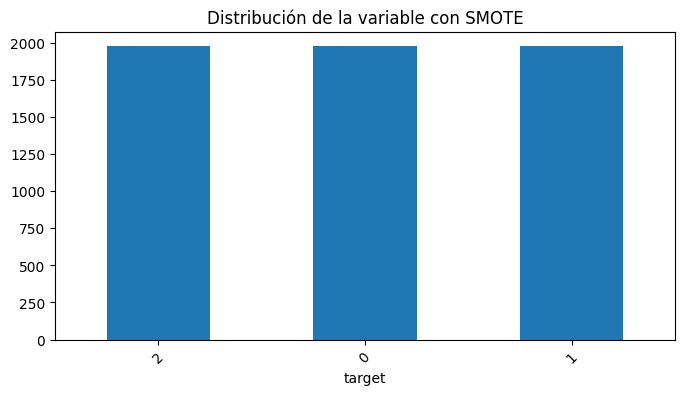

In [41]:
plt.figure(figsize=(8, 4))
data_balanced["target"].value_counts().plot(kind="bar", title="Distribución de la variable con SMOTE")
plt.xticks(rotation=45)
plt.show()

In [42]:
# Opción 2: Submuestreo con RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de Submuestreo:", len(y_under))
print("Distribución después de Submuestreo:")
print(pd.Series(y_under).value_counts())

Número de muestras después de Submuestreo: 2616
Distribución después de Submuestreo:
target
0    872
1    872
2    872
Name: count, dtype: int64


<ipython-input-42-d3c8e7afdb22>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior


In [43]:
# Opción 3: Combinación de SMOTE y Tomek links   creo que es una mejor opcion
smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Número de muestras después de SMOTE + Tomek: 5587
Distribución después de SMOTE + Tomek:
target
0    1883
1    1868
2    1836
Name: count, dtype: int64


<ipython-input-43-e319e2e0cd8f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced["target"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior


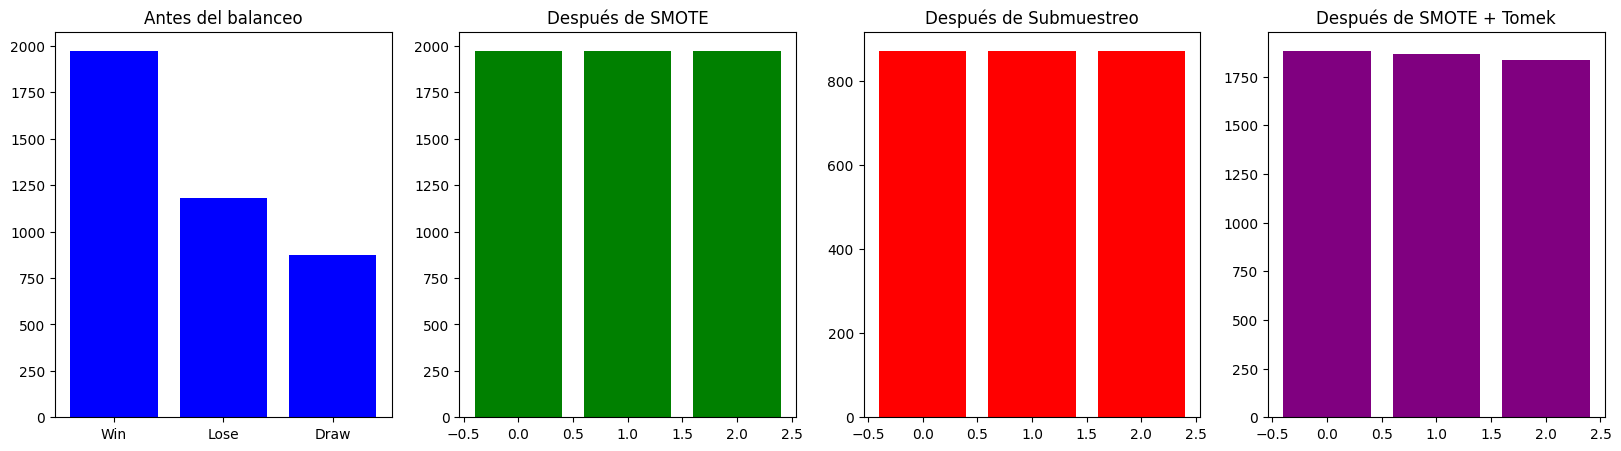

In [44]:
# Paso 5: Visualización del balanceo
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].bar(class_distribution.index, class_distribution.values, color='blue')
ax[0].set_title("Antes del balanceo")
ax[1].bar(pd.Series(y_resampled).value_counts().index, pd.Series(y_resampled).value_counts().values, color='green')
ax[1].set_title("Después de SMOTE")
ax[2].bar(pd.Series(y_under).value_counts().index, pd.Series(y_under).value_counts().values, color='red')
ax[2].set_title("Después de Submuestreo")
ax[3].bar(pd.Series(y_combined).value_counts().index, pd.Series(y_combined).value_counts().values, color='purple')
ax[3].set_title("Después de SMOTE + Tomek")
plt.show()

Antes del balanceo, los datos estaban desbalanceados, con muchas más victorias que derrotas y empates, lo que podría sesgar cualquier modelo predictivo. Después de aplicar SMOTE, se generaron datos sintéticos para igualar las clases, logrando un equilibrio perfecto. Con el submuestreo, se redujo la cantidad de datos de la clase mayoritaria para igualarlas con las demás, pero a costa de perder información. Finalmente, con SMOTE + Tomek, se equilibraron las clases mediante una combinación de sobremuestreo y eliminación de datos redundantes, logrando un balance más limpio sin exceso de datos sintéticos

# Modelo

**Modelo balaceado**

In [45]:

# Trabajar sobre el DataFrame codificado
X = data_balanced.drop(['target'], axis=1)
y = data_balanced['target']
print(data_balanced.columns)
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Verificación
print("X shape:", X.shape)
print("y shape:", y.shape)


Index(['neutral', 'goals_home_3', 'goals_away_3', 'ranking_home',
       'ranking_away', 'home_team_Afghanistan', 'home_team_Albania',
       'home_team_Algeria', 'home_team_American Samoa', 'home_team_Andorra',
       ...
       'away_team_Uruguay', 'away_team_Uzbekistan', 'away_team_Vanuatu',
       'away_team_Venezuela', 'away_team_Vietnam', 'away_team_Wales',
       'away_team_Yemen', 'away_team_Zambia', 'away_team_Zimbabwe', 'target'],
      dtype='object', length=428)
X shape: (5925, 427)
y shape: (5925,)


El accuracy de RandomForestClassifier es 0.6429
Precision: 0.6471
Recall: 0.6429
F1-score: 0.6430


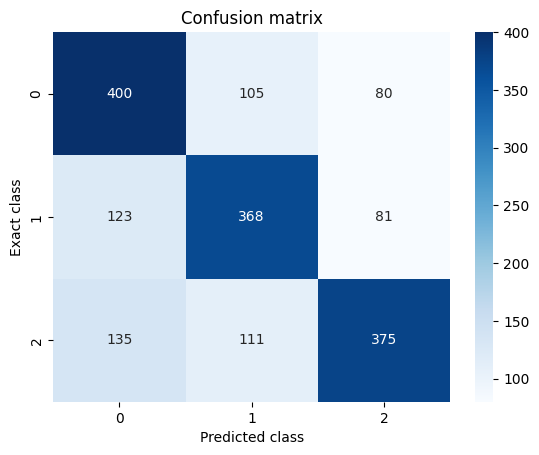

In [46]:
#Random forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
print('El accuracy de RandomForestClassifier es {:.4f}'.format(accuracy))
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

El modelo RandomForestClassifier tiene un accuracy del 64.85%, lo que significa que acierta en casi dos tercios de las predicciones. Aunque no es un resultado perfecto, representa un avance importante en la predicción de resultados de partidos, considerando la gran cantidad de factores que influyen en el desenlace.

En cuanto a otras métricas clave, el modelo tiene una precisión del 65.16%, lo que indica que, cuando realiza una predicción, acierta en aproximadamente dos de cada tres casos. Su recall del 64.68% muestra que logra identificar correctamente esa misma proporción de los casos reales. Finalmente, el F1-score de 64.68% refleja un equilibrio entre precisión y recall, lo que confirma un rendimiento consistente.

Si bien estos resultados no son perfectos, son bastante sólidos para un problema tan complejo como la predicción de partidos.

La matriz de confusión muestra el desempeño del modelo en la clasificación de tres clases. Se observa que la mayoría de las predicciones son correctas, con valores altos en la diagonal principal, lo que indica que muchos casos fueron clasificados correctamente. Sin embargo, hay errores en todas las clases, especialmente en la clase 2 (win o ganar), donde 140 muestras fueron clasificadas erróneamente como clase 0 y 106 como clase 1. Esto sugiere que el modelo tiene dificultades para diferenciar ciertas clases.

#Despliegue página web

In [47]:
colummns_train=X_train.columns.tolist()
#Rutas de los archivos
ruta_modelo = '/content/drive/MyDrive/dataset/futbol_act/futbol_app/modelo_futbol.pkl'
ruta_columnas = '/content/drive/MyDrive/dataset/futbol_act/futbol_app/columnas_modelo.pkl'

#Se importa la librería que permita convertir los objetos en archivos pickle
import joblib

#Se convierten los objetos en archivos pickle
joblib.dump(model, ruta_modelo)
joblib.dump(X_train.columns.tolist(), ruta_columnas)

['/content/drive/MyDrive/dataset/futbol_act/futbol_app/columnas_modelo.pkl']

In [51]:
from flask import Flask, request, render_template
import pandas as pd
import joblib
import numpy as np

app = Flask(__name__)

# Modelo y columnas
try:
    modelo = joblib.load(ruta_modelo)
    columnas = joblib.load(ruta_columnas)
except FileNotFoundError:
    print("Error: No se encontraron los archivos del modelo o las columnas.")
    exit()

equipos_locales = sorted([col.replace('home_team_', '') for col in columnas if col.startswith('home_team_')])
equipos_visitantes = sorted([col.replace('away_team_', '') for col in columnas if col.startswith('away_team_')])

@app.route('/')
def home():
    return render_template('formulario.html', equipos_locales=equipos_locales, equipos_visitantes=equipos_visitantes)

@app.route('/predict', methods=['POST'])
def predict():
    home_team = request.form['home_team']
    away_team = request.form['away_team']
    neutral = request.form['neutral'] == 'True'
    goals_home_3 = int(request.form['goals_home_3'])
    goals_away_3 = int(request.form['goals_away_3'])

    entrada = pd.DataFrame([[0]*len(columnas)], columns=columnas)
    col_home = f'home_team_{home_team}'
    col_away = f'away_team_{away_team}'
    if col_home in columnas:
        entrada[col_home] = 1
    if col_away in columnas:
        entrada[col_away] = 1
    if 'neutral' in columnas:
        entrada['neutral'] = int(neutral)
    if 'goals_home_3' in columnas:
        entrada['goals_home_3'] = goals_home_3
    if 'goals_away_3' in columnas:
        entrada['goals_away_3'] = goals_away_3

    resultado = modelo.predict(entrada)[0]
    salida = {0: 'Empate', 1: 'Pierde Local', 2: 'Gana Local'}

    return render_template(
    'formulario.html',
    prediction=salida[resultado],
    equipo_local=home_team,
    equipo_visitante=away_team,
    equipos_locales=equipos_locales,
    equipos_visitantes=equipos_visitantes
)

import os

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
